# **Importing dependencies**

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

# Loading CIFAR dataset,train-test split

In [2]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()


170498071/170498071 [==============================] - 6s 0us/step


In [3]:
x_train.shape,x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

Plot image

In [4]:
objects = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


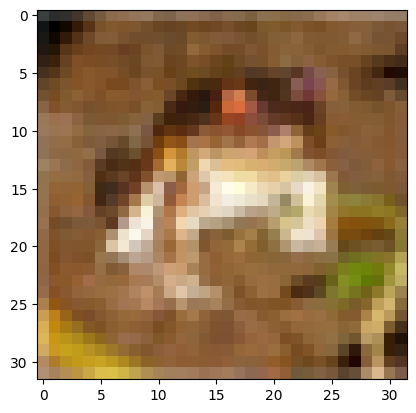

In [5]:
plt.imshow(x_train[0])

In [6]:
y_train=y_train.reshape(-1,)

In [7]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

# Plotting the image

In [8]:
def plot_img(x,y,i):
    plt.figure(figsize=(16,4))
    plt.imshow(x[i])
    plt.xlabel(objects[y[i]])

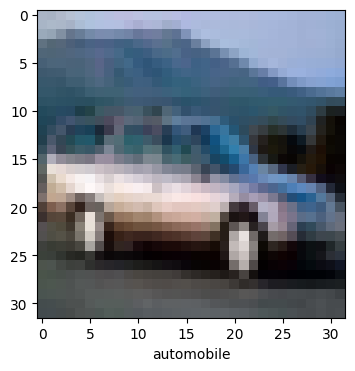

In [9]:
plot_img(x_train,y_train,4)

# Scale the data

In [10]:
x_train=x_train/255
x_test=x_test/255

# Model Building 

In [11]:
cnn_model=models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [12]:
cnn_model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# Training the model

In [13]:
cnn_model.fit(x_train,y_train,epochs=15)

Epoch 1/15
1563/1563 [==============================] - 26s 16ms/step - loss: 1.4693 - accuracy: 0.4718
Epoch 2/15
1563/1563 [==============================] - 25s 16ms/step - loss: 1.1054 - accuracy: 0.6123
Epoch 3/15
1563/1563 [==============================] - 25s 16ms/step - loss: 0.9876 - accuracy: 0.6550
Epoch 4/15
1563/1563 [==============================] - 25s 16ms/step - loss: 0.9058 - accuracy: 0.6850
Epoch 5/15
1563/1563 [==============================] - 25s 16ms/step - loss: 0.8369 - accuracy: 0.7077
Epoch 6/15
1563/1563 [==============================] - 25s 16ms/step - loss: 0.7851 - accuracy: 0.7250
Epoch 7/15
1563/1563 [==============================] - 25s 16ms/step - loss: 0.7332 - accuracy: 0.7444
Epoch 8/15
1563/1563 [==============================] - 25s 16ms/step - loss: 0.6905 - accuracy: 0.7587
Epoch 9/15
1563/1563 [==============================] - 25s 16ms/step - loss: 0.6537 - accuracy: 0.7707
Epoch 10/15
1563/1563 [==============================] - 25s 16m

In [14]:
cnn_model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 1.0408 - accuracy: 0.6983


[1.0407997369766235, 0.6983000040054321]

In [15]:
y_test=y_test.reshape(-1,)

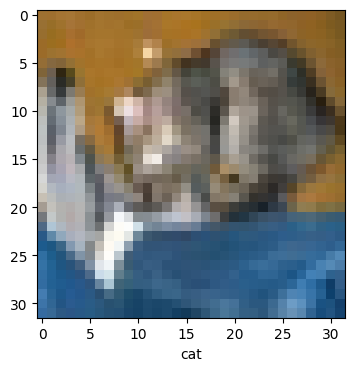

In [16]:
plot_img(x_test,y_test,0)

# Prediction

In [17]:
y_predict=cnn_model.predict(x_test)

313/313 [==============================] - 2s 7ms/step


In [18]:
y_predict[:5]

array([[1.01983000e-03, 1.67410963e-05, 3.42323282e-03, 9.32202399e-01,
        1.42179793e-04, 3.36710848e-02, 2.46865605e-03, 8.22992879e-05,
        2.69713793e-02, 2.08670122e-06],
       [5.00425404e-06, 2.22048461e-02, 1.18429251e-11, 8.59100180e-10,
        6.52485010e-11, 8.32677982e-10, 9.01274788e-09, 4.55598059e-12,
        9.77768779e-01, 2.13858912e-05],
       [2.57379338e-02, 7.33925223e-01, 1.75404805e-03, 6.78662397e-03,
        2.30030459e-03, 6.19659666e-04, 1.49858510e-03, 2.11571925e-03,
        1.14750095e-01, 1.10511698e-01],
       [5.97499967e-01, 1.50384975e-03, 6.85862685e-03, 6.05393201e-03,
        2.78715719e-03, 1.61460281e-04, 8.18645203e-05, 2.53154012e-05,
        3.83366495e-01, 1.66133023e-03],
       [2.25331220e-09, 2.04072694e-05, 1.09240320e-02, 2.25284994e-02,
        3.32188606e-01, 6.57053752e-05, 6.34269714e-01, 1.85267004e-06,
        1.12090220e-06, 6.07216819e-08]], dtype=float32)

In [19]:
y_pred=[np.argmax(element) for element in y_predict]

In [20]:
y_pred[:5]

[3, 8, 1, 0, 6]

In [21]:
objects[y_pred[0]]

'cat'

# Classification report

In [22]:
from sklearn.metrics import classification_report

In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74      1000
           1       0.76      0.83      0.80      1000
           2       0.59      0.56      0.57      1000
           3       0.57      0.46      0.51      1000
           4       0.71      0.62      0.66      1000
           5       0.59      0.64      0.62      1000
           6       0.69      0.83      0.75      1000
           7       0.76      0.73      0.75      1000
           8       0.84      0.78      0.81      1000
           9       0.70      0.81      0.75      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000

